<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/NAVTTC_MLOps_ANN_Project/blob/main/Data_Cleaning_and_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow.keras

In [5]:
mlflow.login()

2024/09/07 07:34:27 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("/content/alzheimers_disease_patient_data.csv")

In [8]:
df.shape

(2149, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [10]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [14]:
df.drop(["PatientID", "DoctorInCharge", "Ethnicity", "EducationLevel", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP"], axis=1, inplace=True)

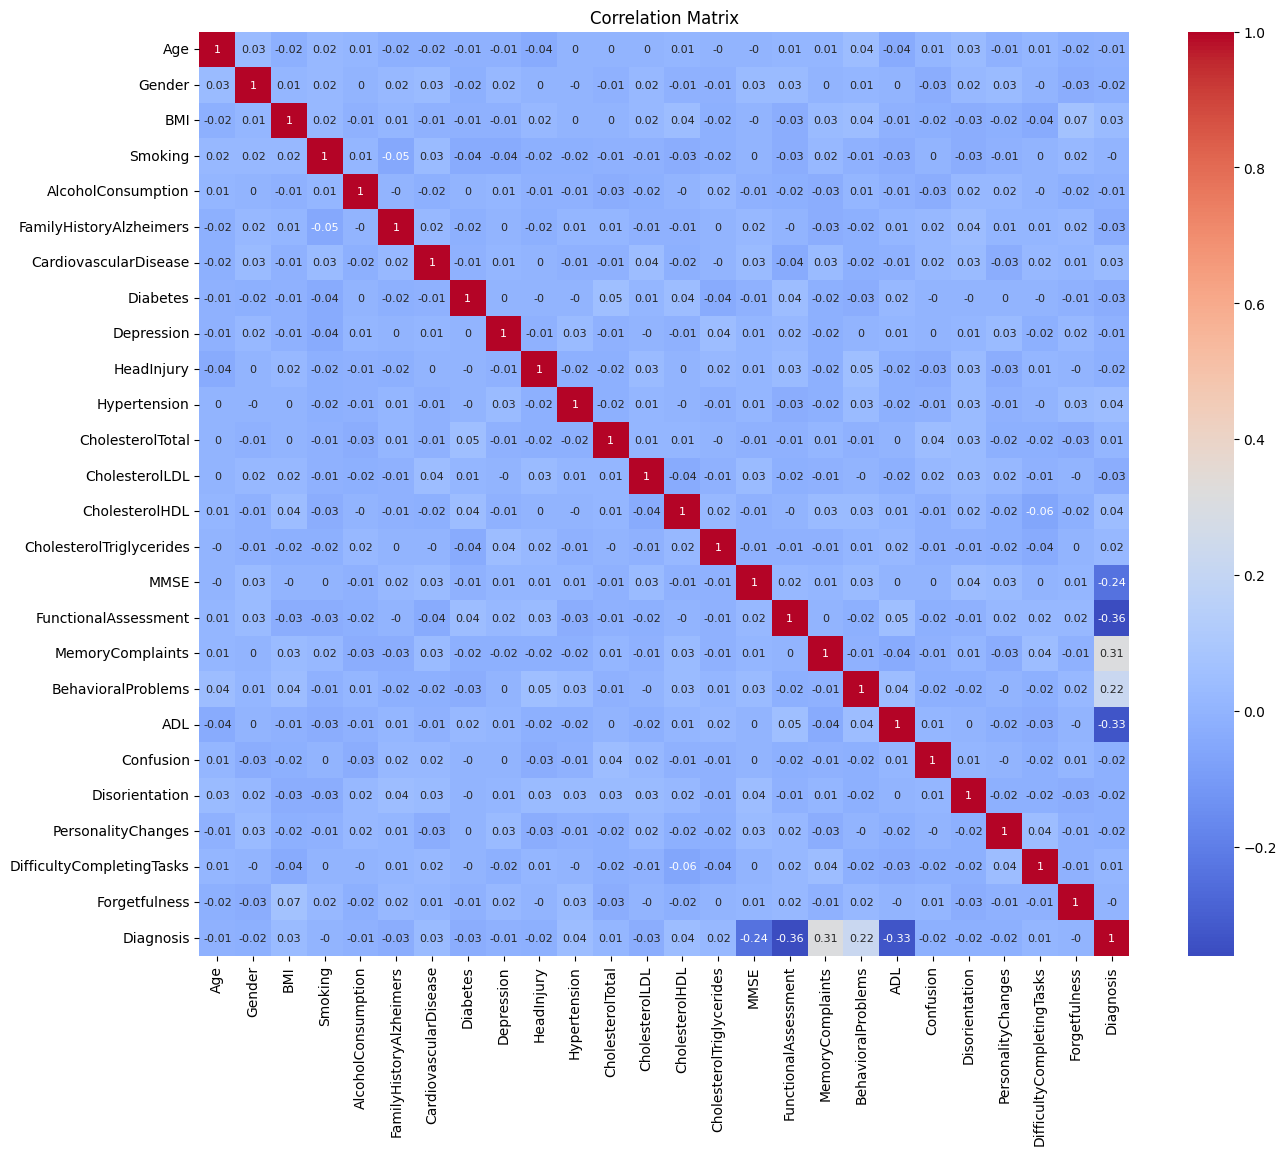

In [15]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [16]:
def binary_detection(column):
  unique_values = column.unique()
  return set(unique_values).issubset({0, 1})

In [17]:
binary_columns = [col for col in df.columns if binary_detection(df[col])]

In [18]:
df["ADL"] = df["ADL"].astype(int)
df["FunctionalAssessment"] = df["FunctionalAssessment"].astype(int)
df["MMSE"] = df["MMSE"].astype(int)
df["AlcoholConsumption"] = df["AlcoholConsumption"].astype(int)

In [19]:
binary_columns = [col for col in df.columns if binary_detection(df[col])]
df_not_to_scale = df[binary_columns]

In [20]:
df_to_scale = df[["Age", "CholesterolLDL", "CholesterolHDL", "BMI", "CholesterolTotal", "CholesterolTriglycerides"]]
df_not_to_scale = df.drop(df_to_scale, axis=1)

In [21]:
df_not_to_scale.head()

,Gender,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,13,0,0,1,1,0,0,21,6,0,0,1,0,0,0,1,0,0
1,0,0,4,0,0,0,0,0,0,20,7,0,0,2,0,0,0,0,1,0
2,0,0,19,1,0,0,0,0,0,7,5,0,0,7,0,1,0,1,0,0
3,1,1,12,0,0,0,0,0,0,13,8,0,1,6,0,0,0,0,0,0
4,0,0,18,0,0,0,0,0,0,13,6,0,0,0,0,0,1,1,0,0


In [22]:
df_to_scale.head()

,Age,CholesterolLDL,CholesterolHDL,BMI,CholesterolTotal,CholesterolTriglycerides
0,73,56.150897,33.682563,22.927749,242.366840,162.189143
1,89,193.407996,79.028477,26.827681,231.162595,294.630909
2,73,153.322762,69.772292,17.795882,284.181858,83.638324
3,74,65.366637,68.457491,33.800817,159.582240,277.577358
4,89,92.869700,56.874305,20.716974,237.602184,291.198780


In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)

In [24]:
df_scaled = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

In [25]:
processed_df = pd.concat([df_scaled, df_not_to_scale], axis=1)

In [26]:
processed_df.head()

,Age,CholesterolLDL,CholesterolHDL,BMI,CholesterolTotal,CholesterolTriglycerides,Gender,Smoking,AlcoholConsumption,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,-1.572661,-1.114429,-0.655225,0.403677,-0.648199,0,0,13,0,0,1,1,0,0,21,6,0,0,1,0,0,0,1,0,0
1,1.567757,1.593119,0.845730,-0.114751,0.140248,0.650721,0,0,4,0,0,0,0,0,0,20,7,0,0,2,0,0,0,0,1,0
2,-0.212368,0.668569,0.445615,-1.366428,1.386812,-1.418585,0,0,19,1,0,0,0,0,0,7,5,0,0,7,0,1,0,1,0,0
3,-0.101111,-1.360103,0.388780,0.851625,-1.542715,0.483468,1,1,12,0,0,0,0,0,0,13,8,0,1,6,0,0,0,0,0,0
4,1.567757,-0.725756,-0.111924,-0.961607,0.291653,0.617060,0,0,18,0,0,0,0,0,0,13,6,0,0,0,0,0,1,1,0,0


In [27]:
X = processed_df.drop("Diagnosis", axis=1)
y = processed_df["Diagnosis"]

In [28]:
lr_clf = LogisticRegression(penalty="l1", solver="saga", max_iter=1000)
lr_clf.fit(X, y)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [29]:
lasso_importance = pd.DataFrame({"Feature": X.columns, "Lasso Importance": lr_clf.coef_[0]})
lasso_importance.sort_values(by="Lasso Importance", ascending=False)

,Feature,Lasso Importance
17,MemoryComplaints,2.543552
18,BehavioralProblems,2.446458
14,Hypertension,0.143365
10,CardiovascularDisease,0.122982
2,CholesterolHDL,0.103667
23,DifficultyCompletingTasks,0.076753
5,CholesterolTriglycerides,0.064671
12,Depression,0.027649
4,CholesterolTotal,0.006374
11,Diabetes,0.000000


In [30]:
model_for_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(model_for_rfe, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [31]:
rfe_importance = pd.DataFrame({"Feature": X.columns, "RFE Importance": rfe.ranking_})
rfe_importance.sort_values(by="RFE Importance")

,Feature,RFE Importance
18,BehavioralProblems,1
14,Hypertension,1
13,HeadInjury,1
17,MemoryComplaints,1
9,FamilyHistoryAlzheimers,1
7,Smoking,1
16,FunctionalAssessment,1
21,Disorientation,1
1,CholesterolLDL,1
19,ADL,1


In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [33]:
rf_importance = pd.DataFrame({"Feature": X.columns, "Random Forest Importance": rf_clf.feature_importances_})
rf_importance.sort_values(by="Random Forest Importance", ascending=False)

,Feature,Random Forest Importance
16,FunctionalAssessment,0.196635
19,ADL,0.183373
15,MMSE,0.148765
17,MemoryComplaints,0.100812
18,BehavioralProblems,0.061115
5,CholesterolTriglycerides,0.042196
3,BMI,0.038343
2,CholesterolHDL,0.038301
1,CholesterolLDL,0.038288
4,CholesterolTotal,0.036881


In [34]:
importances = pd.concat([lasso_importance, rfe_importance["RFE Importance"], rf_importance["Random Forest Importance"]], axis=1)
importances.sort_values(by="RFE Importance")

,Feature,Lasso Importance,RFE Importance,Random Forest Importance
18,BehavioralProblems,2.446458,1,0.061115
14,Hypertension,0.143365,1,0.004877
13,HeadInjury,-0.246074,1,0.003201
17,MemoryComplaints,2.543552,1,0.100812
9,FamilyHistoryAlzheimers,-0.097948,1,0.004794
7,Smoking,-0.187524,1,0.004571
16,FunctionalAssessment,-0.442869,1,0.196635
21,Disorientation,-0.072779,1,0.004608
1,CholesterolLDL,-0.118881,1,0.038288
19,ADL,-0.410789,1,0.183373


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/alzheimers-disease-prediction")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1427253586395219', creation_time=1725692057957, experiment_id='1427253586395219', last_update_time=1725693675878, lifecycle_stage='active', name='/alzheimers-disease-prediction', tags={'mlflow.experiment.sourceName': '/alzheimers-disease-prediction',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'alisyednaqvi1512@gmail.com',
 'mlflow.ownerId': '415373725542243'}>

In [37]:
with mlflow.start_run(run_name="Run 1"):
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  checkpoint = ModelCheckpoint('alzheimers_model.keras', monitor='val_loss', save_best_only=True)

  mlflow.log_param("optimizer", "Adam")
  mlflow.log_param("loss_function", "binary_crossentropy")
  mlflow.log_param("epochs", 50)

  history = model.fit(X_train, y_train, epochs=50, validation_data=[X_test, y_test], callbacks=[early_stopping])

  for epoch in range(30):
    mlflow.log_metric("train_accuracy", history.history["accuracy"][epoch], step=epoch)
    mlflow.log_metric("val_accuracy", history.history["val_accuracy"][epoch], step=epoch)
    mlflow.log_metric("train_loss", history.history["loss"][epoch], step=epoch)
    mlflow.log_metric("val_loss", history.history["val_loss"][epoch], step=epoch)

  mlflow.keras.log_model(model, "model")

  final_train_accuracy = history.history["accuracy"][-1]
  final_val_accuracy = history.history["val_accuracy"][-1]
  final_train_loss = history.history["loss"][-1]
  final_val_loss = history.history["val_loss"][-1]

  mlflow.log_metric("final_train_accuracy", final_train_accuracy)
  mlflow.log_metric("final_val_accuracy", final_val_accuracy)
  mlflow.log_metric("final_train_loss", final_train_loss)
  mlflow.log_metric("final_val_loss", final_val_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5245 - loss: 1.0700 - val_accuracy: 0.6767 - val_loss: 0.5985
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - loss: 0.7130 - val_accuracy: 0.6907 - val_loss: 0.5704
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.6024 - val_accuracy: 0.7186 - val_loss: 0.5564
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.6233 - val_accuracy: 0.7093 - val_loss: 0.5472
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.5875 - val_accuracy: 0.7209 - val_loss: 0.5392
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 0.5669 - val_accuracy: 0.7233 - val_loss: 0.5285
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7143 - loss: 0.5537 - val_accuracy: 0.7279 - val_loss: 0.5221
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.5527 - val_accuracy: 0.7372 - val_loss:

2024/09/07 07:35:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/09/07 07:35:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Uploading artifacts:   0%|          | 0/6 [00:00<?, ?it/s]

2024/09/07 07:35:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Run 1 at: https://community.cloud.databricks.com/ml/experiments/1427253586395219/runs/f0fb8dc293b84099a1081acaf0805c7c.
2024/09/07 07:35:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/1427253586395219.


In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.3419 
Validation Loss: 0.36189040541648865
Validation Accuracy: 0.8558139801025391


In [39]:
model.save("alzhemiers_prediction.keras")